In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from skimage import io
from skimage.util import random_noise
from skimage import transform  
import os
import cv2
import random


def load_images(folder, image_size=(640, 640)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  
            img_path = os.path.join(folder, filename)
            
            try:
                img = io.imread(img_path)
                
                if img is None or img.size == 0:
                    print(f"Warning: Gagal memuat gambar {filename}. lanjut...")
                    continue

                img_resized = cv2.resize(img, image_size)
                
                if len(img_resized.shape) == 3 and img_resized.shape[2] == 3:
                    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
                
                img_smoothed = cv2.GaussianBlur(img_resized, (5, 5), 0)
                img_normalized = img_smoothed / 255.0
                images.append(img_resized)

            
            except Exception as e:
                print(f"Error: Gagal memuat gambar {filename}. Error: {e}")
                continue
    
    return np.array(images)

dataset_path = './Foto_dataset/' 

images = load_images(dataset_path)

print(f"Jumlah gambar yang dimuat: {len(images)}")




Jumlah gambar yang dimuat: 104


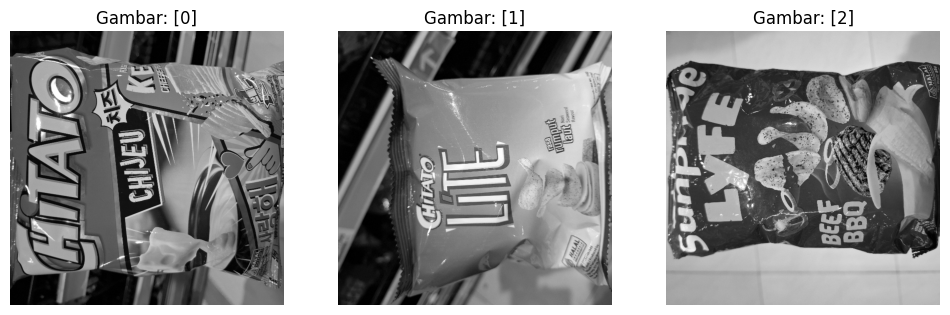

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):  
    ax[i].imshow(images[i], cmap='gray') 
    ax[i].set_title(f"Gambar: {[i]}")
    ax[i].axis('off') 

plt.show()